# Week 12: Colab Experiment


# I. Introduction

In this exercise, we learn an autoencoder to reconstruct the MNIST images and extract the representations.


In [1]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import random


In [2]:
# Run this once to load the train and test data straight into a dataloader class
# that will provide the batches
batch_size_train = 64
batch_size_test = 1000
train_loader = torch.utils.data.DataLoader(torchvision.datasets.MNIST(
    '../data/',
    train=True,
    download=True,
    transform=torchvision.transforms.Compose([
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.1307, ), (0.3081, ))
    ])),
                                           batch_size=batch_size_train,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(torchvision.datasets.MNIST(
    '../data/',
    train=False,
    download=True,
    transform=torchvision.transforms.Compose([
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.1307, ), (0.3081, ))
    ])),
                                          batch_size=batch_size_test,
                                          shuffle=True)

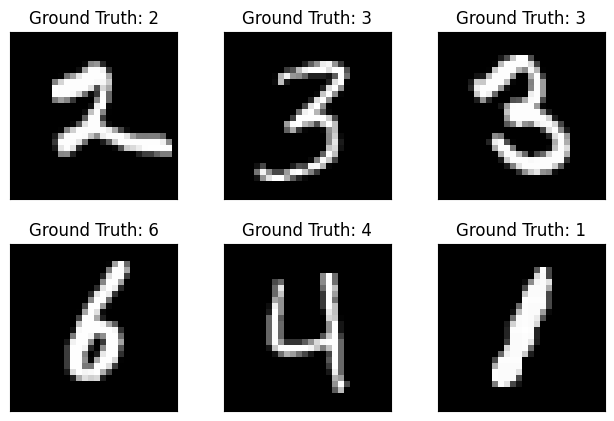

In [3]:
# Let's draw some of the training data
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

fig = plt.figure()
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title("Ground Truth: {}".format(example_targets[i]))
    plt.xticks([])
    plt.yticks([])
plt.show()

# II. Methods


In [4]:
# TODO : Finish the Model
class LAutoencoder(nn.Module):

    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            # TODO
            # The encoder at least 3 hidden layers, each with 128, 64, and 2 hidden units respectively
            nn.Linear(28 * 28, 128),
            nn.ReLU(True),
            nn.Linear(128, 64),
            nn.ReLU(True),
            nn.Linear(64, 2))
        self.decoder = nn.Sequential(
            # TODO
            # The decoder also has at least 3 layers with the same number of hidden units in reversed order
            nn.Linear(2, 64),
            nn.ReLU(True),
            nn.Linear(64, 128),
            nn.ReLU(True),
            nn.Linear(128, 28 * 28),
            nn.Tanh()
            )

    def forward(self, x):
        # TODO
        latent = self.encoder(x)
        x = self.decoder(latent)
        return x, latent

In [5]:
def set_seed(seed):
    random.seed(seed)
    torch.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)


set_seed(1216)

# Training steps


In [6]:
num_epochs = 10
learning_rate = 2e-3

model = LAutoencoder()
criterion = nn.MSELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

best_model = None
best_loss = float('inf')

# TODO : Finish the training steps
for epoch in range(num_epochs):
    for data in train_loader:
        #  TODO
        image, _ = data
        image = image.view(image.size(0), -1)

        optimizer.zero_grad()

        output, latent = model(image)
        loss = criterion(output, image)

        loss.backward()
        optimizer.step()

    print(f'epoch [{epoch + 1}/{num_epochs}], loss:{loss.data.item()}')

    if loss.data.item() < best_loss:
        best_loss = loss.data.item()
        best_model = model

model = best_model


epoch [1/10], loss:0.555977463722229
epoch [2/10], loss:0.5504367351531982
epoch [3/10], loss:0.5878642201423645
epoch [4/10], loss:0.5262021422386169
epoch [5/10], loss:0.574815571308136
epoch [6/10], loss:0.5052277445793152
epoch [7/10], loss:0.5017361640930176
epoch [8/10], loss:0.5141937732696533
epoch [9/10], loss:0.5142983198165894
epoch [10/10], loss:0.5405768752098083


## III. Results

We train the autoencoder model and apply it to the test set. There is no validation set here, we simply take the model at the end of the training procedure. The scatter plot of the embeddings are shown below, with each digit colored differently.


In [7]:
# %matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


def scatter_plot(data_loader):

    d = {
        0: 'red',
        1: "green",
        2: "blue",
        3: "maroon",
        4: "yellow",
        5: "pink",
        6: "brown",
        7: "black",
        8: "teal",
        9: "aqua"
    }

    colors = []
    latent_variables = []
    labels = []
    for data in data_loader:
        # for data in test_loader:
        img, label = data
        img = img.view(img.size(0), -1)
        model.cpu()
        _, latent = model(img)
        latent_variables.append(latent)
        labels.append(label)

    latent_variables = torch.cat(latent_variables, dim=0)
    labels = torch.cat(labels, dim=0)

    df = pd.DataFrame(data=latent_variables.detach().numpy(),
                      columns=['Latent feature 1', 'Latent feature 2'])
    df['label'] = labels.numpy()

    fig = plt.figure(dpi=200)
    sns.scatterplot(data=df,
                    x="Latent feature 1",
                    y="Latent feature 2",
                    hue="label",
                    # palette="deep")
                    palette=d)
    plt.show()

The test set:


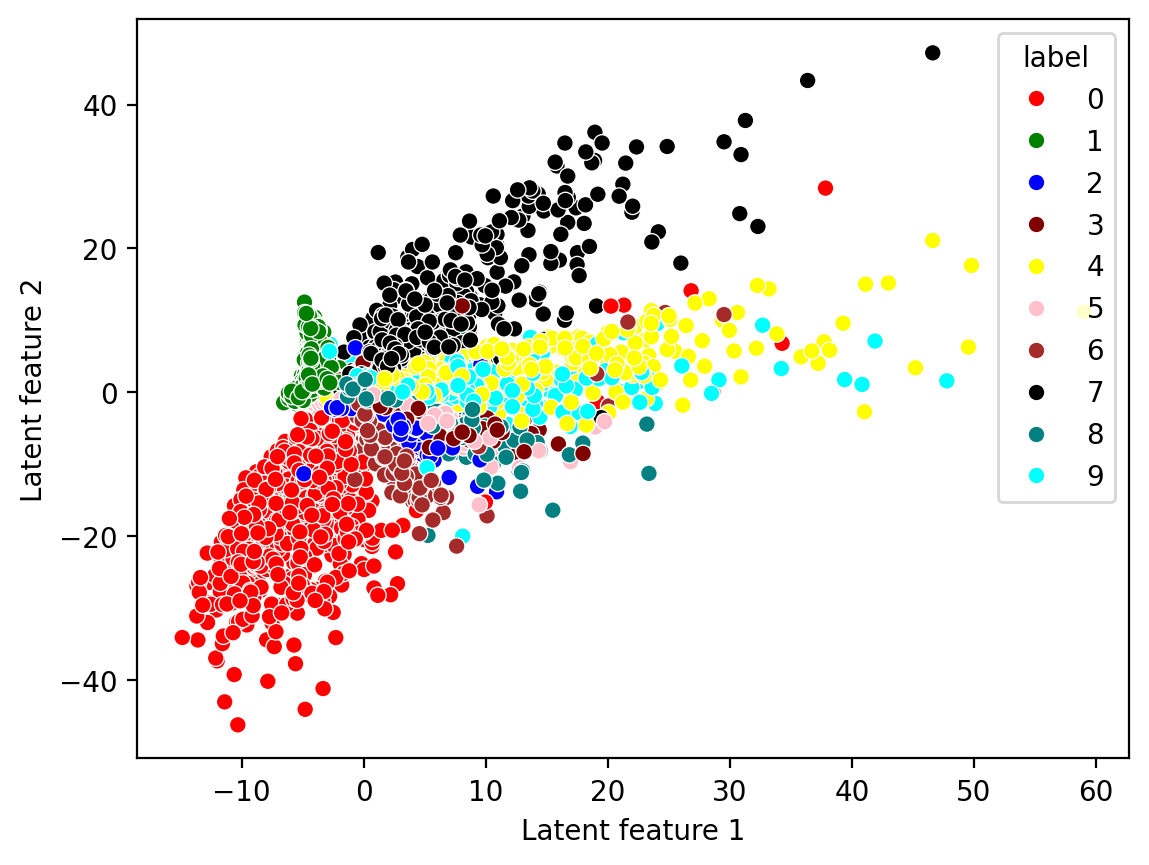

In [8]:
print("The test set:")
scatter_plot(test_loader)

# IV. Conclusion and Discussion


In this project, we would like to train an autoencoder to reconstruct the MNIST images and extract the representations using latnt space features.

1. **Import Libraries**

   Import essential libraries such as PyTorch, Torchvision, Matplotlib, and others required for building and training the models.

2. **Load and Preprocess MNIST Dataset**
   
   The MNIST dataset is loaded from Torchvision libaray. The dataset consists of grayscale images of handwritten digits from 0 to 9, with corresponding labels. Data loaders are created for training and testing sets, facilitating batch processing for efficient model training. Apply neccessary transformations, such as converting images to tensors and normalizing pixel values based on the dataset's mean and standard deviation, are applied to ensure consistent input for the neural network.

3. **Visualize Dataset Sample**
   
   To gain insight into the dataset, sample images from the first batch of the test set are displayed, along with their ground truth labels. This visualization helps us understand the diversity and the structure of the data.

4. **Define the Autoencoder Architectures**

    Based on the description from TA, we define an encoder that consists of a minimum of three hidden layers with 128, 62, and 2 units in each layer, respectively. The decoder has the same number of hidden units in reversed order. ReLU and Sigmoid are the most frequently used activation functions in autoencoders. For this reason, we have chosen ReLU as our activation function. Furthermore, since the MNIST data has been normalized using its mean and standard deviation, and its possible range falls between  -1 to 1, we opted to use the Tanh function instead of Sigmoid. The model structure is listed below.

    ```bash=
    ----------------------------------------------------------------
            Layer (type)               Output Shape         Param #
    ================================================================
                Linear-1               [-1, 1, 128]         100,480
                ReLU-2                 [-1, 1, 128]               0
                Linear-3                [-1, 1, 64]           8,256
                ReLU-4                  [-1, 1, 64]               0
                Linear-5                 [-1, 1, 2]             130
                Linear-6                [-1, 1, 64]             192
                ReLU-7                  [-1, 1, 64]               0
                Linear-8               [-1, 1, 128]           8,320
                ReLU-9                 [-1, 1, 128]               0
                Linear-10              [-1, 1, 784]         101,136
                Tanh-11                [-1, 1, 784]               0
    ================================================================
    Total params: 218,514
    Trainable params: 218,514
    Non-trainable params: 0
    ----------------------------------------------------------------
    ```

5. **Set Random Seed**

   Fix the seed for reproducibility of results across runs.

6. **Initialize Model with Hyperparameters, and Model Training.**

   Instantiate the autoencoder model, set Mean Squared Error (MSE) as the loss function to measure reconstruction quality, and initialize the AdamW optimizer with the specified learning rate to adjust model weights efficiently. Since we trained the model without using a validation set, we tracked the model with the lowest training loss and designated it as the best model after completing all epochs.

   For each epoche
   
   - Loop over the training data in batches.
   - Reset the gradients of the optimizer to prepare for the current batch update.
   - Perform a forward pass through the model to generate reconstructed outputs and extract latent space features.
   - Calculate the reconstructiono loss using MSE loss function.
   - Perform backward pass and update the model parameters.
   - Record the loss for monitoring training progress.

7. **Display Results**

   The test set is applied to the trained model, and the latent space representations for each data point are recorded. Using a scatter plot, we visualize the embeddings, assigning a specified color to each digit. The final result shows a distinct center with other points scattered around it. This indicates that feature1 and feature2 cannot explain the majority of the data but can effectively distinguish some subsets of it.

8. **Conclusion and Discussion**

   As an unsupervised model, the autoencoder was trained without a validation set, which made it difficult to determine an optimal gradient direction during training. This leaves some opportunity for substantial improvement. Enhancements could include adding more layers, such as an additional 256-unit hidden layer, which could significantly reduce the loss. Increasing the latent space dimensions would also provide more redundancy, as opposed to limiting it to 2 dimensions for visualization. Additionally, introducing a validation set during training could guide the model more effectively along the gradient descent path, resulting in a more robust performance.